# ! This is Part 2 We did part 1 in other file this is file 2

In [129]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pyspark.sql.functions as F

In [130]:
spark = SparkSession.builder.appName("Covid").getOrCreate()

In [131]:
spark

In [132]:
df = spark.read.csv('/Users/mukkukalyan/Downloads/Big_Data_Assesment/Dataset.csv')

In [133]:
spark.read.option("header","true").csv("/Users/mukkukalyan/Downloads/Big_Data_Assesment/Dataset.csv")

DataFrame[index: string, USMER: string, MEDICAL_UNIT: string, SEX: string, PATIENT_TYPE: string, DATE_DIED: string, INTUBED: string, PNEUMONIA: string, AGE: string, PREGNANT: string, DIABETES: string, COPD: string, ASTHMA: string, INMSUPR: string, HIPERTENSION: string, OTHER_DISEASE: string, CARDIOVASCULAR: string, OBESITY: string, RENAL_CHRONIC: string, TOBACCO: string, CLASIFFICATION_FINAL: string, ICU: string]

In [134]:
spark.read.option("header","true").csv("/Users/mukkukalyan/Downloads/Big_Data_Assesment/Dataset.csv").show()

+-----+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|index|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|
+-----+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|    2|    2|           1|  2|           2|09/06/2020|      1|        2| 55|       ?|       1|   2|     2|      2|           2|            2|             2|      2|            2|      2|                   3|2.0|
|    5|    2|           1|  1|           2|9999-99-99|      2|        1| 40|       2|       2|   2|     2|      2|           2|            2|           

In [135]:
# Converting the Data Types to respective data types here we are converting data types into integers
from pyspark.sql.functions import col

# First, rename the columns to match your expected schema
column_names = ['INDEX','USMER','MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE','DATE_DIED', 'INTUBED', 'PNEUMONIA','AGE', 'PREGNANT','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE','CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL','ICU' ]

# Rename columns (only rename as many as you have)
df = df.toDF(*column_names[:len(df.columns)])

# Now you can safely convert the columns
boolean_cols = ['USMER','SEX','MEDICAL_UNIT','PATIENT_TYPE', 'INTUBED', 'PNEUMONIA','AGE', 'PREGNANT', 'DIABETES',
               'COPD', 'ASTHMA','INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
               'OBESITY', 'RENAL_CHRONIC', 'TOBACCO','CLASIFFICATION_FINAL','ICU']


for col_name in boolean_cols:
    df = df.withColumn(col_name, col(col_name).cast('integer'))


In [136]:
df

DataFrame[INDEX: string, USMER: int, MEDICAL_UNIT: int, SEX: int, PATIENT_TYPE: int, DATE_DIED: string, INTUBED: int, PNEUMONIA: int, AGE: int, PREGNANT: int, DIABETES: int, COPD: int, ASTHMA: int, INMSUPR: int, HIPERTENSION: int, OTHER_DISEASE: int, CARDIOVASCULAR: int, OBESITY: int, RENAL_CHRONIC: int, TOBACCO: int, CLASIFFICATION_FINAL: int, ICU: int]

In [137]:
# we know that data has 1 as yes, 2 as no, let's change the 2 to 0

In [138]:
boolean_cols = ['USMER','SEX','PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES',
               'COPD', 'ASTHMA','INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
               'OBESITY', 'RENAL_CHRONIC', 'TOBACCO','ICU']

for col_name in boolean_cols:
    df = df.withColumn(col_name, when(col(col_name) == 2, 0).otherwise(col(col_name)))

In [139]:
# Drop unnecessary columns 
df = df.drop('index')

In [140]:
df

DataFrame[USMER: int, MEDICAL_UNIT: int, SEX: int, PATIENT_TYPE: int, DATE_DIED: string, INTUBED: int, PNEUMONIA: int, AGE: int, PREGNANT: int, DIABETES: int, COPD: int, ASTHMA: int, INMSUPR: int, HIPERTENSION: int, OTHER_DISEASE: int, CARDIOVASCULAR: int, OBESITY: int, RENAL_CHRONIC: int, TOBACCO: int, CLASIFFICATION_FINAL: int, ICU: int]

In [141]:
# Let's change the Date_Died format(string) to date
from pyspark.sql.functions import to_date

df = df.withColumn("DATE_DIED", to_date("DATE_DIED", "dd/MM/yyyy"))

In [142]:
df

DataFrame[USMER: int, MEDICAL_UNIT: int, SEX: int, PATIENT_TYPE: int, DATE_DIED: date, INTUBED: int, PNEUMONIA: int, AGE: int, PREGNANT: int, DIABETES: int, COPD: int, ASTHMA: int, INMSUPR: int, HIPERTENSION: int, OTHER_DISEASE: int, CARDIOVASCULAR: int, OBESITY: int, RENAL_CHRONIC: int, TOBACCO: int, CLASIFFICATION_FINAL: int, ICU: int]

In [143]:
spark.read.option("header","true").csv("/Users/mukkukalyan/Downloads/Big_Data_Assesment/Dataset.csv").show()

+-----+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|index|USMER|MEDICAL_UNIT|SEX|PATIENT_TYPE| DATE_DIED|INTUBED|PNEUMONIA|AGE|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|CLASIFFICATION_FINAL|ICU|
+-----+-----+------------+---+------------+----------+-------+---------+---+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+--------------------+---+
|    2|    2|           1|  2|           2|09/06/2020|      1|        2| 55|       ?|       1|   2|     2|      2|           2|            2|             2|      2|            2|      2|                   3|2.0|
|    5|    2|           1|  1|           2|9999-99-99|      2|        1| 40|       2|       2|   2|     2|      2|           2|            2|           

In [144]:
df

DataFrame[USMER: int, MEDICAL_UNIT: int, SEX: int, PATIENT_TYPE: int, DATE_DIED: date, INTUBED: int, PNEUMONIA: int, AGE: int, PREGNANT: int, DIABETES: int, COPD: int, ASTHMA: int, INMSUPR: int, HIPERTENSION: int, OTHER_DISEASE: int, CARDIOVASCULAR: int, OBESITY: int, RENAL_CHRONIC: int, TOBACCO: int, CLASIFFICATION_FINAL: int, ICU: int]

In [145]:
# Le't Replace the ? with Nan

In [146]:
from pyspark.sql.functions import col, when, lit
from pyspark.sql.types import DoubleType, IntegerType

columns_list = ['USMER','SEX','PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 
               'DIABETES','COPD', 'ASTHMA','INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 
               'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO','ICU']

# 1. Replace "?" with null and convert to numeric
for column in columns_list:
    df = df.withColumn(column, 
                      when(col(column) == "?", None)
                      .otherwise(col(column))
                      .cast(DoubleType()))  # or IntegerType() if appropriate

# 2. Check data types
df.printSchema()


root
 |-- USMER: double (nullable = true)
 |-- MEDICAL_UNIT: integer (nullable = true)
 |-- SEX: double (nullable = true)
 |-- PATIENT_TYPE: double (nullable = true)
 |-- DATE_DIED: date (nullable = true)
 |-- INTUBED: double (nullable = true)
 |-- PNEUMONIA: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PREGNANT: double (nullable = true)
 |-- DIABETES: double (nullable = true)
 |-- COPD: double (nullable = true)
 |-- ASTHMA: double (nullable = true)
 |-- INMSUPR: double (nullable = true)
 |-- HIPERTENSION: double (nullable = true)
 |-- OTHER_DISEASE: double (nullable = true)
 |-- CARDIOVASCULAR: double (nullable = true)
 |-- OBESITY: double (nullable = true)
 |-- RENAL_CHRONIC: double (nullable = true)
 |-- TOBACCO: double (nullable = true)
 |-- CLASIFFICATION_FINAL: integer (nullable = true)
 |-- ICU: double (nullable = true)



In [147]:
# Counting null values (equivalent to isnull().sum() in pandas)
from pyspark.sql.functions import isnull, sum as spark_sum

null_counts = df.select([spark_sum(isnull(c).cast("int")).alias(c) 
                        for c in columns_list])
null_counts.show()

+-----+---+------------+-------+---------+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+----+
|USMER|SEX|PATIENT_TYPE|INTUBED|PNEUMONIA|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO| ICU|
+-----+---+------------+-------+---------+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+----+
|    1|  1|           1|   7326|     5145|  118793|    1196|1065|  1067|   1281|        1107|         2075|          1144|   1114|         1075|   1127|7489|
+-----+---+------------+-------+---------+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+----+



In [148]:
from pyspark.sql.functions import col, sum as spark_sum, count
from pyspark.sql import functions as F

# Calculate total number of rows
total_rows = df.count()

# Calculate null percentages for all columns
null_percentages = df.select(*[(spark_sum(col(c).isNull().cast("integer")) / total_rows * 100).alias(c) for c in df.columns]).first().asDict()

# Convert to dictionary and filter out columns with 0% nulls
null_percentages_filtered = {k: v for k, v in null_percentages.items() if v > 0}

# Sort by percentage descending and print
print("Percentage of Missing Values:")
for col_name, percent in sorted(null_percentages_filtered.items(), key=lambda x: x[1], reverse=True):
    print(f"{col_name}: {percent:.2f}%")

Percentage of Missing Values:
DATE_DIED: 64.97%
PREGNANT: 59.39%
ICU: 3.74%
INTUBED: 3.66%
PNEUMONIA: 2.57%
OTHER_DISEASE: 1.04%
INMSUPR: 0.64%
DIABETES: 0.60%
CARDIOVASCULAR: 0.57%
TOBACCO: 0.56%
OBESITY: 0.56%
HIPERTENSION: 0.55%
RENAL_CHRONIC: 0.54%
ASTHMA: 0.53%
COPD: 0.53%
USMER: 0.00%
MEDICAL_UNIT: 0.00%
SEX: 0.00%
PATIENT_TYPE: 0.00%
AGE: 0.00%
CLASIFFICATION_FINAL: 0.00%


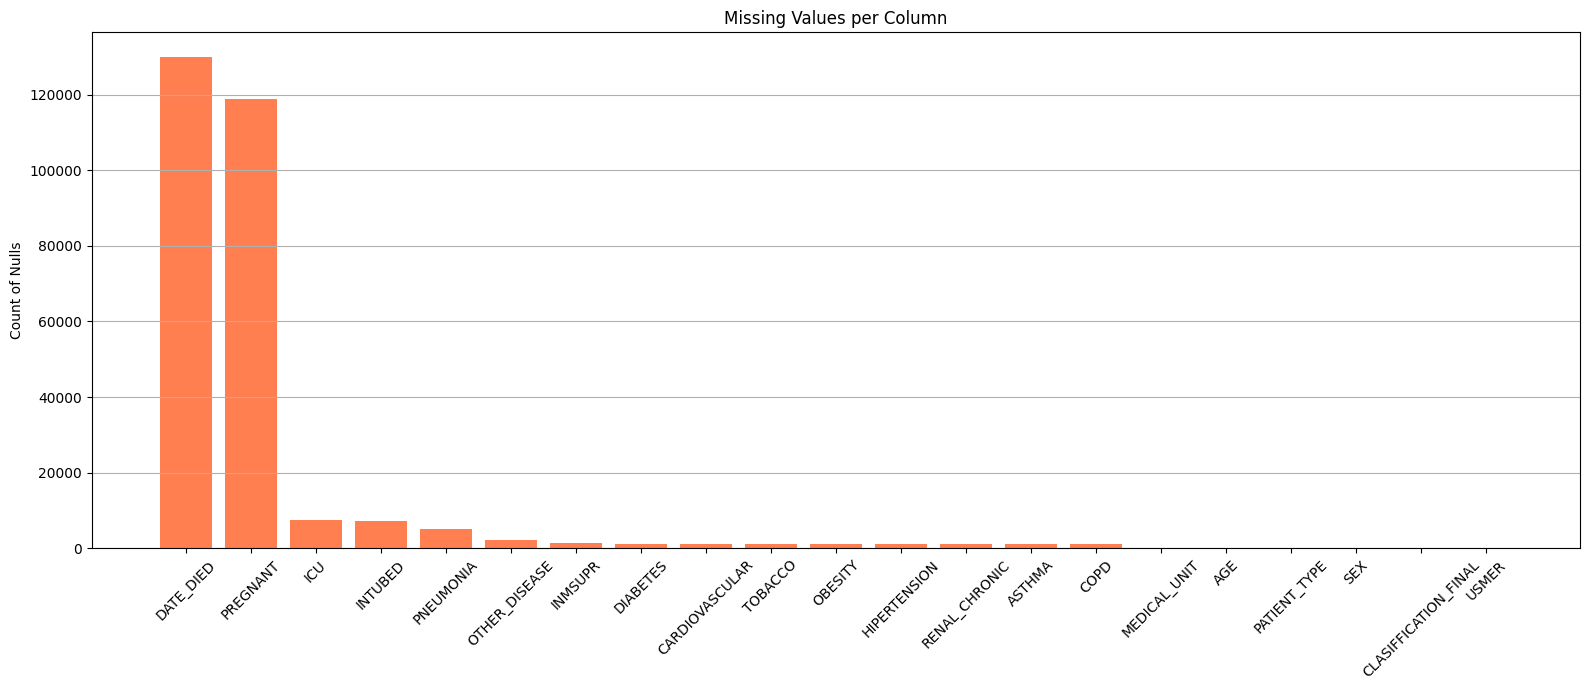

In [149]:
from pyspark.sql.functions import col, sum as spark_sum
import matplotlib.pyplot as plt

# Calculate null counts for each column
null_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts_pd = null_counts.toPandas().transpose().reset_index()
null_counts_pd.columns = ['Column', 'Null_Count']
null_counts_pd = null_counts_pd.sort_values('Null_Count', ascending=False)

# Filter for columns with nulls and plot
null_counts_filtered = null_counts_pd[null_counts_pd['Null_Count'] > 0]

plt.figure(figsize=(16, 7))
plt.bar(null_counts_filtered['Column'], null_counts_filtered['Null_Count'], color='coral')
plt.title("Missing Values per Column")
plt.ylabel("Count of Nulls")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# In the previous model we dropped the null values let's fix the null values here

Understanding Your Missing Data
Dataset has nulls in categorical features (despite numerical encoding).

Key columns with missing counts:

High Nulls: PREGNANT (118K)

Moderate Nulls: INTUBED (7.3K), PNEUMONIA (5.1K),OTHER_DISEASE (2K), ICU (7.5K)

Low Nulls: Most others (<1.5K) 

In [150]:
from pyspark.sql.functions import col
from pyspark.sql import DataFrame

# List of columns with moderate/low nulls
moderate_low_nulls = ["USMER",'INTUBED',"PATIENT_TYPE",'PNEUMONIA','SEX', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR','OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU']

# Function to calculate mode for a column
def get_mode(df: DataFrame, column_name: str):
    return (df.groupBy(column_name).count().orderBy('count', ascending=False).first()[0])

# Impute missing values with mode for each column
for column in moderate_low_nulls:
    # Calculate mode for the current column
    mode_value = get_mode(df, column)
    
    # Fill null values with the mode
    df = df.withColumn(column, col(column).cast("integer"))  
    df = df.fillna({column: mode_value})

# Verify no nulls remain in these columns
from pyspark.sql.functions import isnull, sum as spark_sum

null_counts = df.select([spark_sum(isnull(c).cast("int")).alias(c) 
                       for c in moderate_low_nulls])
null_counts.show()

+-----+-------+------------+---------+---+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+---+
|USMER|INTUBED|PATIENT_TYPE|PNEUMONIA|SEX|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|ICU|
+-----+-------+------------+---------+---+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+---+
|    0|      0|           0|        0|  0|       0|   0|     0|      0|           0|            0|             0|      0|            0|      0|  0|
+-----+-------+------------+---------+---+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+---+



Now for High null values, we are doing 2 things 1 is updating the male values in pragancey and also finding the females mode of pregrancy to impute the data and we have null values very high in preganant column only.

Auto-Setting Males to Non-Pregnant (0) For all male patients (where SEX == 1), we automatically set PREGNANT = 0. This is because biologically, males cannot become pregnant.

This step:

Prevents biologically impossible values (like marking males as pregnant)

Eliminates the need to impute pregnancy status for males

Is implemented with: df.loc[df['SEX'] == 1, 'PREGNANT'] = 0

Imputation for Females For female patients (where SEX == 0), we use a more nuanced approach:

First, we calculate the most common pregnancy status (mode) among females with known data:

female_preg_mode = df[df['SEX'] == 0]['PREGNANT'].mode()[0]

This finds the statistically most likely pregnancy status for females

Then we apply this mode value only to female patients with missing pregnancy data:

df.loc[(df['SEX'] == 0) & (df['PREGNANT'].isna()), 'PREGNANT'] = female_preg_mode

Imputing mean to the AGE column

In [151]:
from pyspark.sql.functions import mean

numeric_columns = df["AGE"]  
mean_value = df.select(mean(col(column))).first()[0]
df = df.fillna({column: mean_value})


In [152]:
from pyspark.sql.functions import col, when

# 1. Set males (SEX=0) to PREGNANT=0
df = df.withColumn("PREGNANT", 
                  when(col("SEX") == 0, 0)
                  .otherwise(col("PREGNANT")))

# 2. Calculate mode of PREGNANT for females (SEX=1)
# First filter for females and get the mode
female_preg_mode = (df.filter(col("SEX") == 1)
                     .groupBy("PREGNANT")
                     .count()
                     .orderBy("count", ascending=False)
                     .first()[0])

# 3. Impute missing PREGNANT values for females with the mode
df = df.withColumn("PREGNANT",
                  when((col("SEX") == 1) & (col("PREGNANT").isNull()), female_preg_mode)
                  .otherwise(col("PREGNANT")))

In [153]:
null_counts = df.select([spark_sum(isnull(c).cast("int")).alias(c) 
                        for c in columns_list])
null_counts.show()

+-----+---+------------+-------+---------+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+---+
|USMER|SEX|PATIENT_TYPE|INTUBED|PNEUMONIA|PREGNANT|DIABETES|COPD|ASTHMA|INMSUPR|HIPERTENSION|OTHER_DISEASE|CARDIOVASCULAR|OBESITY|RENAL_CHRONIC|TOBACCO|ICU|
+-----+---+------------+-------+---------+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+---+
|    0|  0|           0|      0|        0|       0|       0|   0|     0|      0|           0|            0|             0|      0|            0|      0|  0|
+-----+---+------------+-------+---------+--------+--------+----+------+-------+------------+-------------+--------------+-------+-------------+-------+---+



Let's Check for the duplicated values in the dataset

In [154]:
duplicate_count = df.groupBy(df.columns).agg(count("*").alias("count"))\
.filter("count > 1").count()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 18052


There are 18k duplicate values are there, here we come with 2 situations

Problem: Removing 18K duplicates could discard meaningful patterns if these represent real patients with identical symptoms.

Opportunity: Keeping all duplicates might bias the model if they’re true redundancies (e.g., data entry errors).



In [155]:

# Drop duplicate rows based on all columns
df_deduped = df.dropDuplicates()

duplicate_count = df_deduped.groupBy(df.columns).agg(count("*").alias("count"))\
.filter("count > 1").count()
print(f"Number of duplicate rows: {duplicate_count}")
#  in this dataset df_deduplicated there is no duplicted values

[Stage 2072:==================>                                     (1 + 2) / 3]

Number of duplicate rows: 0


In [156]:
stats_df = df.describe()
stats_df.show()

stats_data = stats_df.collect()

structured_stats = {}
for row in stats_data:
    stat_name = row[0]
    structured_stats[stat_name] = {}
    for i, col_name in enumerate(stats_df.columns[1:]):  # Skip the first column ("summary")
        structured_stats[stat_name][col_name] = row[i + 1]

print(structured_stats)


+-------+------------------+-----------------+-------------------+------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+--------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+------------------+
|summary|             USMER|     MEDICAL_UNIT|                SEX|PATIENT_TYPE|            INTUBED|         PNEUMONIA|               AGE|           PREGNANT|           DIABETES|                COPD|              ASTHMA|            INMSUPR|       HIPERTENSION|       OTHER_DISEASE|     CARDIOVASCULAR|            OBESITY|       RENAL_CHRONIC|            TOBACCO|CLASIFFICATION_FINAL|               ICU|
+-------+------------------+-----------------+-------------------+------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------

count': {'USMER': '200032', 'MEDICAL_UNIT': '200031', 'SEX': '200032', 'PATIENT_TYPE': '200032', 'INTUBED': '200032', 'PNEUMONIA': '200032', 'AGE': '200031', 'PREGNANT': '200032', 'DIABETES': '200032', 'COPD': '200032', 'ASTHMA': '200032', 'INMSUPR': '200032', 'HIPERTENSION': '200032', 'OTHER_DISEASE': '200032', 'CARDIOVASCULAR': '200032', 'OBESITY': '200032', 'RENAL_CHRONIC': '200032', 'TOBACCO': '200032', 'CLASIFFICATION_FINAL': '200031', 'ICU': '200032'}, 

In [157]:
pandas_stats = stats_df.toPandas()

# Now you can use Pandas functions for analysis
print(pandas_stats)

# Example: Transpose for easier comparison
print(pandas_stats.set_index('summary').T)


  summary               USMER       MEDICAL_UNIT                  SEX  \
0   count              200032             200031               200032   
1    mean  0.5570758678611423  7.405347171188466   0.4085646296592545   
2  stddev  0.4967329049181554  3.693445812792264  0.49156971129360105   
3     min                   0                  1                    0   
4     max                   1                 13                    1   

  PATIENT_TYPE              INTUBED           PNEUMONIA                 AGE  \
0       200032               200032              200032              200031   
1          0.0  0.16825307950727883  0.6098424252119661   52.77003064524999   
2          0.0  0.37409180738831926  0.4877866655746034  19.829845876366143   
3            0                    0                   0                   0   
4            0                    1                   1                 118   

              PREGNANT             DIABETES  ...                ASTHMA  \
0           

# Summary Stats

The dataset comprises over 200,000 patient records, capturing a mix of demographics, comorbidities, treatments, and outcomes.

Most patients (56%) were treated at USMER facilities, and the average age was around 52.8 years, indicating a wide age range. 
Gender distribution shows approximately 41% females, and pregnancy cases were rare (~1%). 

Common comorbidities include pneumonia (61%), hypertension (33%), and diabetes (~29%), while conditions like asthma, COPD, and immunosuppression were much less prevalent. 

Despite pneumonia being widespread, only ~17% of patients were intubated and ~8.4% admitted to ICU, suggesting that not all severe symptoms led to critical care. 

# Data Visualization

Plot the distribution of unique classes of the target variable.

Plot the count of number of ICU cases against age.

Plot a graph that displays the count of target variable against ‘CLASIFFICATION_FINAL’.

Show the scatter matrix plot and the correlation matrices. Can you identify pairs of highly correlated features.

Generate additional plots that demonstrate your understanding of the problem and the data. You are free to select the plot and features for visualisation. For better visualisation and understanding of data, consider using seaborn library.

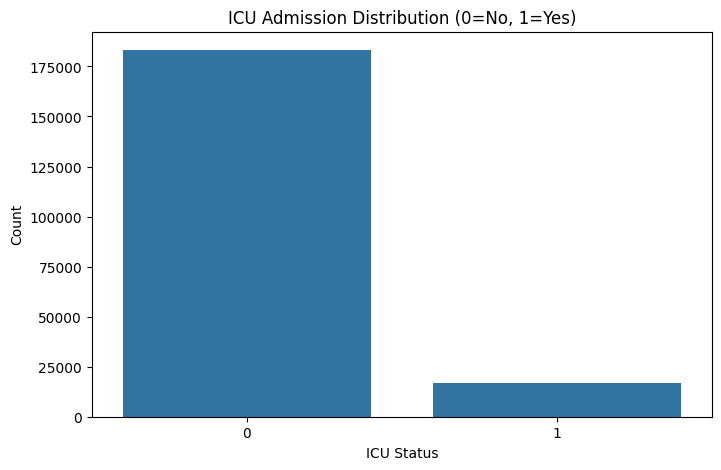

In [158]:
# Plot the distribution of unique classes of the target variable.
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Assuming your PySpark DataFrame is named 'new_df'

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Plot the distribution of unique classes of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=pandas_df, x='ICU')
plt.title("ICU Admission Distribution (0=No, 1=Yes)")
plt.xlabel("ICU Status")
plt.ylabel("Count")
plt.show()



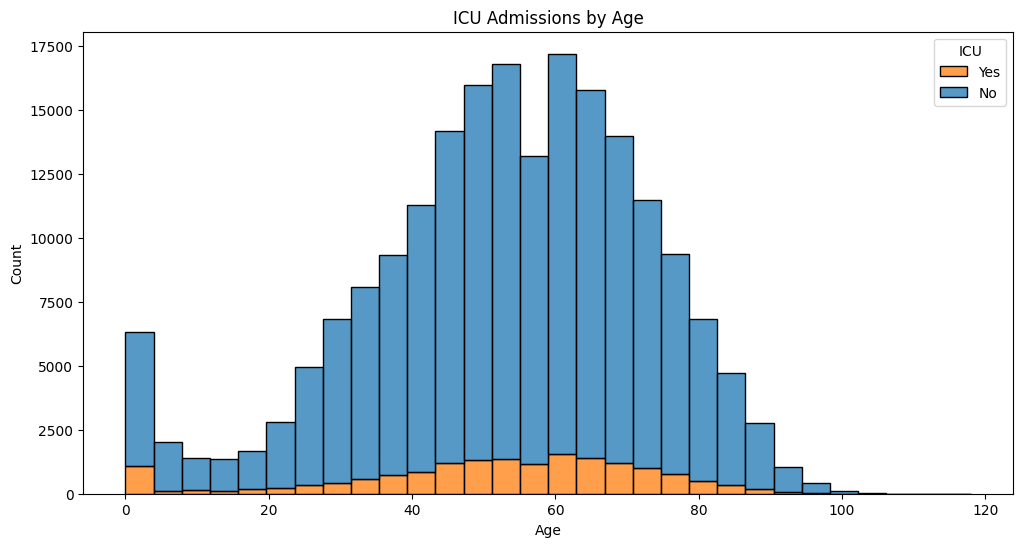

In [159]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

plot_data = df.select("AGE", "ICU").toPandas()  

# Create the plot
plt.figure(figsize=(12,6))
sns.histplot(data=plot_data, x='AGE', hue='ICU', bins=30, multiple='stack')

# Customize the plot
plt.title("ICU Admissions by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='ICU', labels=['Yes', 'No'])  # ICU= 1 is Yes, ICU=0 is No
plt.show()

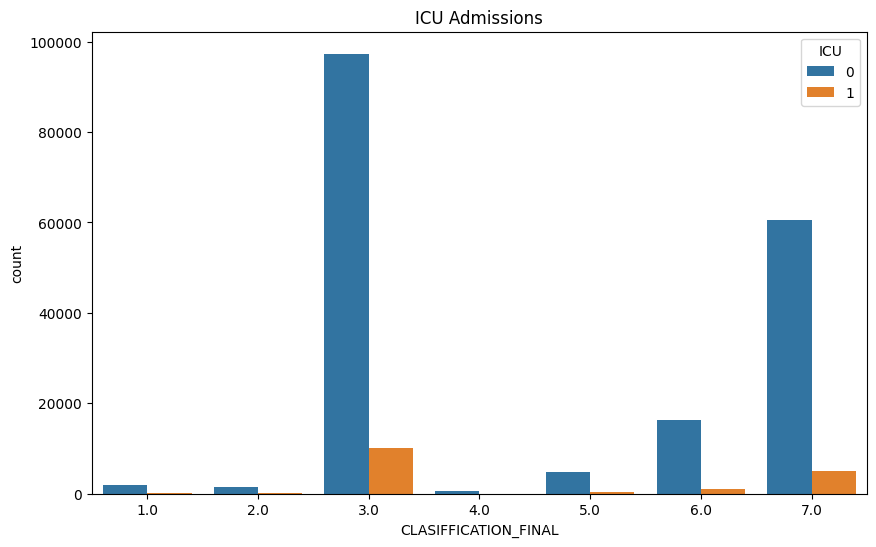

In [160]:
pandas_df = df.toPandas()

# Plot the distribution of ICU admissions by CLASIFFICATION_FINAL
plt.figure(figsize=(10, 6))
sns.countplot(
    data=pandas_df,
    x='CLASIFFICATION_FINAL',
    hue='ICU',
    dodge=True  # Side-by-side bars instead of stacked
)
plt.title("ICU Admissions")
plt.show()

<Figure size 1000x1000 with 0 Axes>

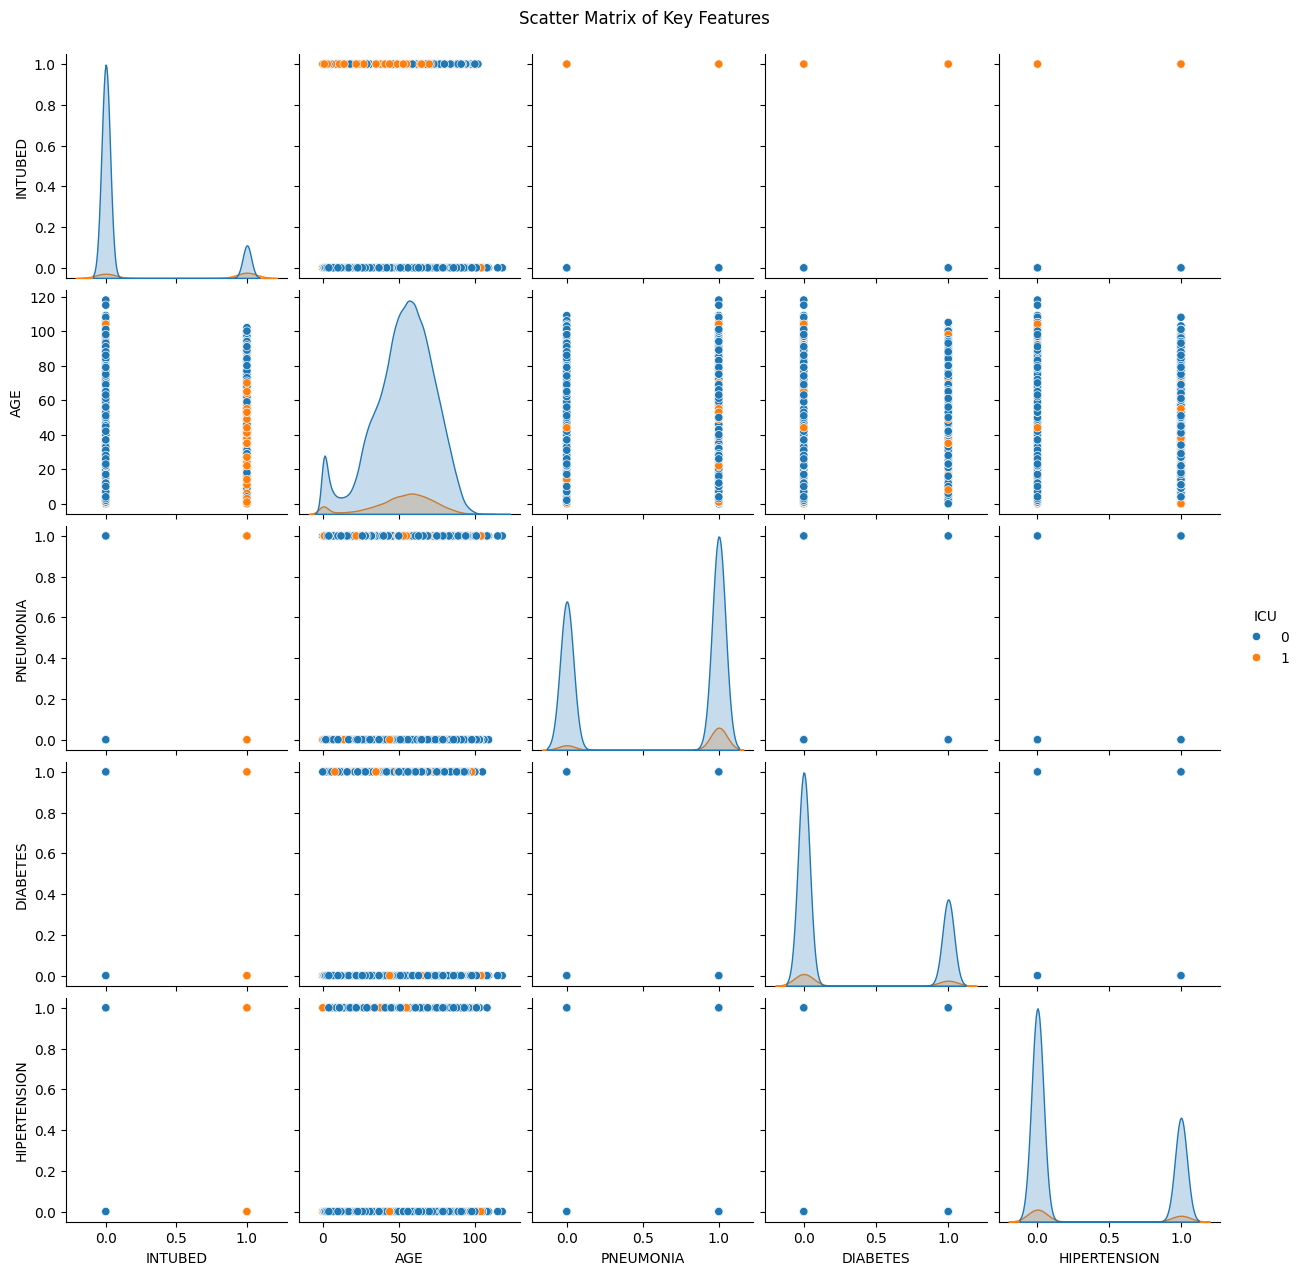

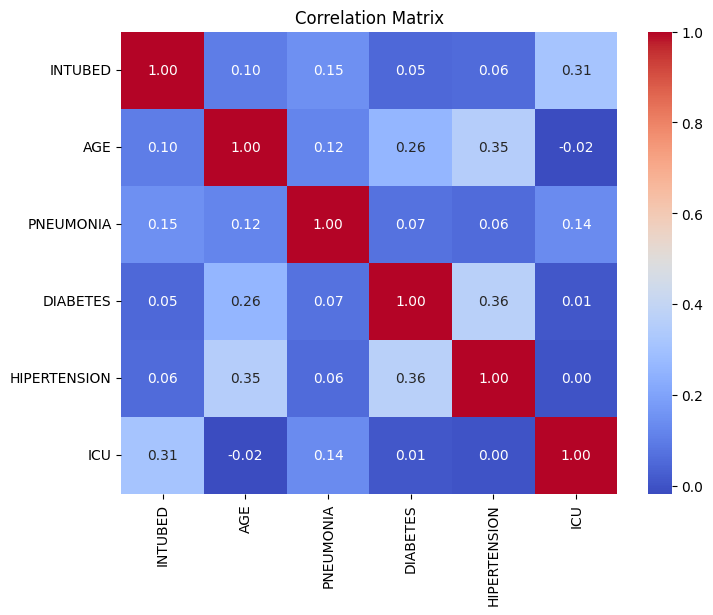

In [161]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Select the features
features = ["INTUBED", 'AGE', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'ICU']
selected_df = df.select(features)

# Convert to Pandas DataFrame
pandas_df = selected_df.toPandas()

# Create the pairplot
plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
sns.pairplot(pandas_df, hue='ICU')
plt.suptitle("Scatter Matrix of Key Features", y=1.02)
plt.show()

# Calculate the correlation matrix
correlation_matrix = pandas_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



# THERE IS HUGE DIFFERENCE IN THE CLASSES IN THE ICU COLUMN SO WE HAVE TO BALANCE IT

# Model building

# Logistic Regression - UnBalanced Data

In [162]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col

# 1. Drop rows with  nulls if any 
df_cleaned = df.dropna()

# 2. Trim whitespace and replace empty strings with None
feature_cols = ["INTUBED", "CLASIFFICATION_FINAL", "OBESITY", "USMER", "CARDIOVASCULAR", "PNEUMONIA", "AGE", "DIABETES"]
for col_name in feature_cols:
    df_cleaned = df_cleaned.withColumn(col_name, when(trim(col(col_name)) == "", None).otherwise(col(col_name)))

# 3. Drop rows that became null after trim and empty string removal.
df_cleaned = df_cleaned.dropna(subset=feature_cols)

# 4. VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(df_cleaned).select("features", col("ICU").alias("label"))

# Split data
train_df, test_df = assembled_df.randomSplit([0.7, 0.3], seed=42)

# Train model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=1000, weightCol="balancedWeight") # use weightCol for class balancing

# Calculate class weights 
pos_weight = train_df.filter(col("label") == 0).count() / train_df.filter(col("label") == 1).count()
train_df = train_df.withColumn("balancedWeight", when(col("label") == 1, pos_weight).otherwise(1.0))

# Cross-validation setup
evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")

paramGrid = ParamGridBuilder().build()  # You can add parameters to tune here

crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator_auc,
                          numFolds=5)

# Cross-validation
cvModel = crossval.fit(train_df)
cv_auc = evaluator_auc.evaluate(cvModel.transform(train_df))
print(f"CV ROC-AUC: {cv_auc:.3f}")

# Train final model with best parameters (no need to fit again)
model = cvModel.bestModel

# Evaluate
predictions = model.transform(test_df)

# Classification Report (using MulticlassClassificationEvaluator - precision, recall, f1)
evaluator_classification = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
precision = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "weightedPrecision"})
recall = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "weightedRecall"})
f1 = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "f1"})

print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {f1:.3f}")

# ROC-AUC
roc_auc = evaluator_auc.evaluate(predictions)
print(f"ROC-AUC: {roc_auc:.3f}")

# Confusion Matrix (manually - PySpark doesn't have a direct confusion_matrix like sklearn)
tp = predictions.filter("label = 1 and prediction = 1").count()
tn = predictions.filter("label = 0 and prediction = 0").count()
fp = predictions.filter("label = 0 and prediction = 1").count()
fn = predictions.filter("label = 1 and prediction = 0").count()

print("Confusion Matrix:")
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")



CV ROC-AUC: 0.769


Classification Report:
Precision: 0.876
Recall: 0.751
F1: 0.792


ROC-AUC: 0.771


[Stage 2258:>                                                       (0 + 3) / 3]

Confusion Matrix:
TP: 1763, TN: 13901, FP: 4519, FN: 668


# Random Forest - unbalanced Data

In [163]:
df = df.drop('DATE_DIED')

In [164]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col

# 1. Drop rows with  nulls 
df_cleaned = df.dropna()

# 2. Trim whitespace and replace empty strings with None
feature_cols = ["INTUBED", "CLASIFFICATION_FINAL", "OBESITY", "USMER", "CARDIOVASCULAR", "PNEUMONIA", "AGE", "DIABETES"]
for col_name in feature_cols:
    df_cleaned = df_cleaned.withColumn(col_name, when(trim(col(col_name)) == "", None).otherwise(col(col_name)))

# 3. Drop rows that became null after trim and empty string removal.
balanced_df = df_cleaned.dropna(subset=feature_cols)

# 4. VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(df_cleaned).select("features", col("ICU").alias("label"))

# Split data
train_df, test_df = assembled_df.randomSplit([0.7, 0.3], seed=42)

# Train model
rf = LogisticRegression(labelCol="label", featuresCol="features", maxIter=1000, weightCol="balancedWeight") # use weightCol for class balancing

# Calculate class weights for imbalance handling
total = train_df.count()
positives = train_df.filter(col("label") == 1).count()
negatives = total - positives
train_df = train_df.withColumn("balancedWeight", col("label").cast("double") * ((total / (2.0 * positives)) if positives > 0 else 0) + (1 - col("label")).cast("double") * ((total / (2.0 * negatives)) if negatives > 0 else 0))

# Cross-validation setup
evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")

paramGrid = ParamGridBuilder().build()  # You can add parameters to tune here

crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator_auc,
                          numFolds=5)

# Cross-validation
cvModel = crossval.fit(train_df)
cv_auc = evaluator_auc.evaluate(cvModel.transform(train_df))
print(f"CV ROC-AUC: {cv_auc:.3f}")

# Train final model with best parameters (no need to fit again)
model = cvModel.bestModel

# Evaluate
predictions = model.transform(test_df)

# Classification Report (using MulticlassClassificationEvaluator - precision, recall, f1)
evaluator_classification = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
precision = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "weightedPrecision"})
recall = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "weightedRecall"})
f1 = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "f1"})

print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {f1:.3f}")

# ROC-AUC
roc_auc = evaluator_auc.evaluate(predictions)
print(f"ROC-AUC: {roc_auc:.3f}")

# Confusion Matrix (manually - PySpark doesn't have a direct confusion_matrix like sklearn)
tp = predictions.filter("label = 1 and prediction = 1").count()
tn = predictions.filter("label = 0 and prediction = 0").count()
fp = predictions.filter("label = 0 and prediction = 1").count()
fn = predictions.filter("label = 1 and prediction = 0").count()

print("Confusion Matrix:")
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")



CV ROC-AUC: 0.774


Classification Report:
Precision: 0.895
Recall: 0.802
F1: 0.837
ROC-AUC: 0.768


Confusion Matrix:
TP: 3033, TN: 45025, FP: 9844, FN: 2058


# Clusters - unbalanced Data

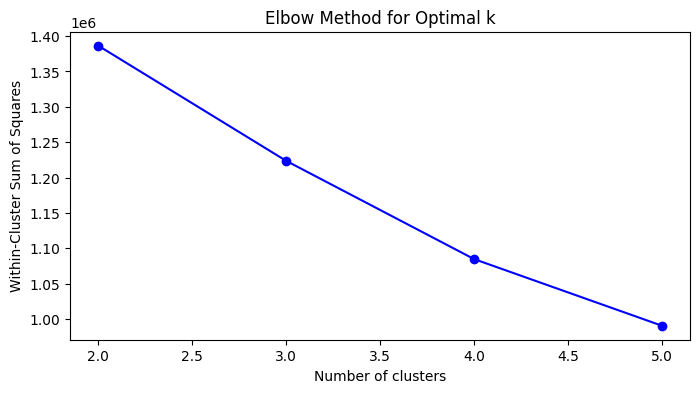


Cluster Distribution vs Target Variable:
ICU             0     1
cluster_id             
0           69274  2826
1           89751  4905
2           24148  9127

Cluster Centers (scaled features):

Cluster 0 Center:
INTUBED: 0.01
CLASIFFICATION_FINAL: 2.95
OBESITY: 0.24
USMER: 1.01
CARDIOVASCULAR: 0.08
PNEUMONIA: 0.54
AGE: 2.01
DIABETES: 0.14

Cluster 1 Center:
INTUBED: 0.00
CLASIFFICATION_FINAL: 2.11
OBESITY: 0.67
USMER: 1.20
CARDIOVASCULAR: 0.33
PNEUMONIA: 1.67
AGE: 3.07
DIABETES: 0.98

Cluster 2 Center:
INTUBED: 2.67
CLASIFFICATION_FINAL: 2.09
OBESITY: 0.59
USMER: 1.13
CARDIOVASCULAR: 0.25
PNEUMONIA: 1.59
AGE: 2.91
DIABETES: 0.75


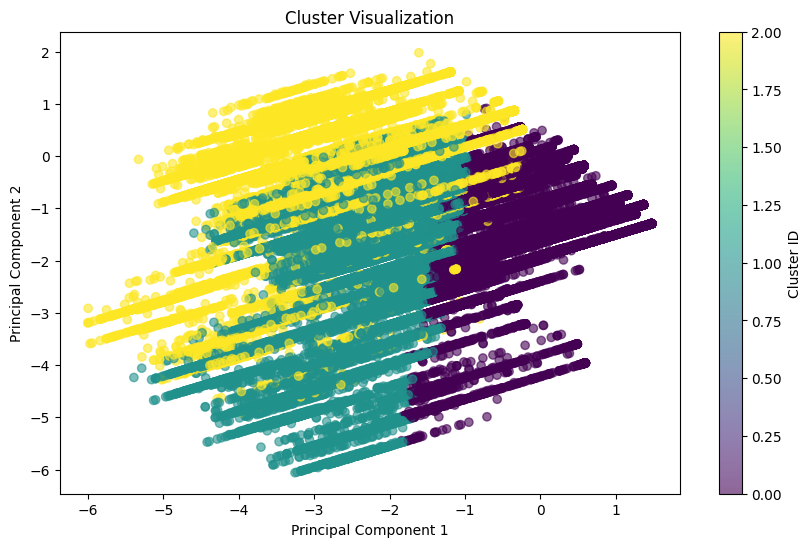


Cluster 0 Model:
AUC: 0.668 | Size: 72100



Cluster 1 Model:
AUC: 0.615 | Size: 94656



Cluster 2 Model:
AUC: 0.654 | Size: 33275



Model Comparison:
Model           AUC        Size      
Global          0.771 200031    
Cluster 0:0.668     72100     
Cluster 1:0.615     94656     
Cluster 2:0.654     33275     


In [167]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler, PCA, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, ClusteringEvaluator
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd

#  Drop rows with  nulls 
df_cleaned = df.dropna()

# 1. Data Preparation
feature_cols = ["INTUBED", "CLASIFFICATION_FINAL", "OBESITY", "USMER", "CARDIOVASCULAR", "PNEUMONIA", "AGE", "DIABETES"]
for col_name in feature_cols:
    df_cleaned = df_cleaned.withColumn(col_name, when(trim(col(col_name)) == "", None).otherwise(col(col_name)))

# Create feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(df_cleaned).select("features", "ICU")

# 2. Feature Scaling
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_data = scaler_model.transform(assembled_df)

# 3. Determine optimal k using elbow method
costs = []
for k in range(2, 6):
    kmeans = KMeans(featuresCol="scaled_features", k=k, seed=42)
    model = kmeans.fit(scaled_data)
    costs.append(model.summary.trainingCost)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(2,6), costs, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.show()

# 4. Fit final KMeans (using k=3)
final_kmeans = KMeans(featuresCol="scaled_features", k=3, seed=42)
kmeans_model = final_kmeans.fit(scaled_data)
clustered_data = kmeans_model.transform(scaled_data)

# Rename cluster prediction column to avoid conflicts
clustered_data = clustered_data.withColumnRenamed("prediction", "cluster_id")

# 5. Cluster Analysis
# 5a. Cluster distribution vs target
cluster_stats = clustered_data.groupBy("cluster_id", "ICU").count().orderBy("cluster_id", "ICU").toPandas()
print("\nCluster Distribution vs Target Variable:")
print(cluster_stats.pivot(index='cluster_id', columns='ICU', values='count').fillna(0))

# 5b. Cluster centers
cluster_centers = kmeans_model.clusterCenters()
print("\nCluster Centers (scaled features):")
for i, center in enumerate(cluster_centers):
    print(f"\nCluster {i} Center:")
    for feature, value in zip(feature_cols, center):
        print(f"{feature}: {value:.2f}")


# 6. Visualize clusters using PCA
pca = PCA(k=2, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(clustered_data)
pca_result = pca_model.transform(clustered_data).toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(pca_result['pca_features'].apply(lambda x: x[0]), 
            pca_result['pca_features'].apply(lambda x: x[1]), 
            c=pca_result['cluster_id'],
            cmap='viridis',
            alpha=0.6)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster ID')
plt.show()

# 7. Build Local Classifiers
cluster_models = {}
for cluster_id in [0, 1, 2]:
    # Filter data for this cluster
    cluster_df = clustered_data.filter(col("cluster_id") == cluster_id)
    
    # Skip if cluster is too small
    if cluster_df.count() < 100:
        print(f"Skipping cluster {cluster_id} - insufficient data")
        continue
    
    # Train/test split
    train, test = cluster_df.randomSplit([0.7, 0.3], seed=42)
    
    # Train model with unique prediction column name
    lr = LogisticRegression(
        featuresCol="features",
        labelCol="ICU",
        predictionCol=f"icu_prediction_{cluster_id}"  # Unique prediction column
    )
    model = lr.fit(train)
    
    # Evaluate
    predictions = model.transform(test)
    evaluator = BinaryClassificationEvaluator(
        labelCol="ICU",
        rawPredictionCol="rawPrediction",
        metricName="areaUnderROC"
    )
    auc = evaluator.evaluate(predictions)
    
    cluster_models[cluster_id] = {
        'model': model,
        'auc': auc,
        'size': cluster_df.count()
    }
    print(f"\nCluster {cluster_id} Model:")
    print(f"AUC: {auc:.3f} | Size: {cluster_df.count()}")

# 8. Compare with Global Model
# Train global model on all data
global_lr = LogisticRegression(
    featuresCol="features",
    labelCol="ICU",
    predictionCol="global_prediction"  # Unique name
)
global_model = global_lr.fit(scaled_data)
global_predictions = global_model.transform(scaled_data)
global_auc = evaluator.evaluate(global_predictions)

print("\nModel Comparison:")
print(f"{'Model':<15} {'AUC':<10} {'Size':<10}")
print(f"{'Global':<15} {global_auc:.3f} {scaled_data.count():<10}")
for cl_id, metrics in cluster_models.items():
    print(f"Cluster {cl_id}:{metrics['auc']:.3f}{'':<5}{metrics['size']:<10}")  # Fixed f-string formatting

# After Balancing the Data

In [39]:
# 1. Separate the majority and minority classes
majority_df = df.filter(col("ICU") == 0)
minority_df = df.filter(col("ICU") == 1)

# 2. Oversample the minority class
majority_count = majority_df.count()
minority_count = minority_df.count()

# Calculate how many times to oversample the minority class
oversample_factor = majority_count / minority_count

# Oversample the minority class using sample and union.
oversampled_minority_df = minority_df.sample(withReplacement=True, fraction=oversample_factor, seed=42)

# 3. Combine the oversampled minority class with the majority class
balanced_df = majority_df.union(oversampled_minority_df)

# 4. Verify the balanced data
balanced_df.groupBy("ICU").count().show()



+---+------+
|ICU| count|
+---+------+
|  0|183174|
|  1|182859|
+---+------+



# Clusters - Balanced Data

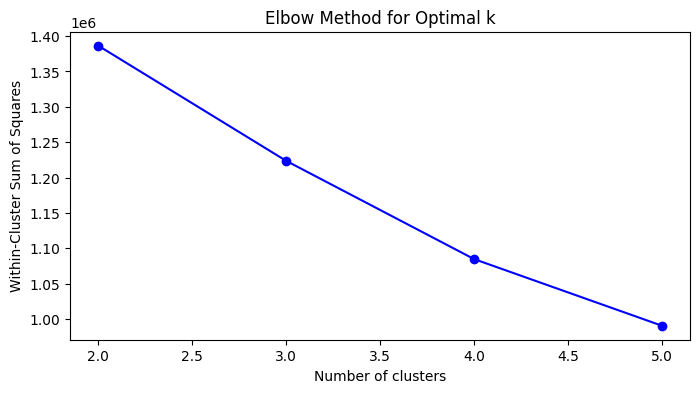


Cluster Distribution vs Target Variable:
ICU             0     1
cluster_id             
0           69274  2826
1           89751  4905
2           24148  9127

Cluster Centers (scaled features):

Cluster 0 Center:
INTUBED: 0.01
CLASIFFICATION_FINAL: 2.95
OBESITY: 0.24
USMER: 1.01
CARDIOVASCULAR: 0.08
PNEUMONIA: 0.54
AGE: 2.01
DIABETES: 0.14

Cluster 1 Center:
INTUBED: 0.00
CLASIFFICATION_FINAL: 2.11
OBESITY: 0.67
USMER: 1.20
CARDIOVASCULAR: 0.33
PNEUMONIA: 1.67
AGE: 3.07
DIABETES: 0.98

Cluster 2 Center:
INTUBED: 2.67
CLASIFFICATION_FINAL: 2.09
OBESITY: 0.59
USMER: 1.13
CARDIOVASCULAR: 0.25
PNEUMONIA: 1.59
AGE: 2.91
DIABETES: 0.75


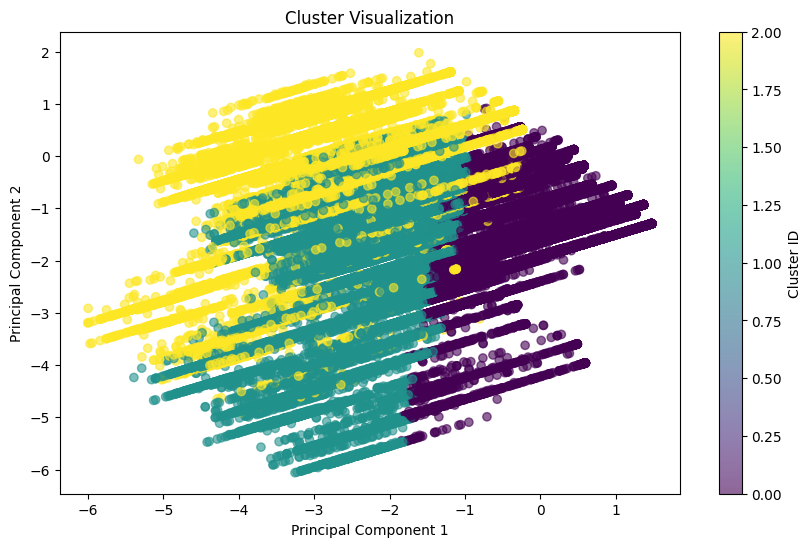


Cluster 0 Model:
AUC: 0.668 | Size: 72100



Cluster 1 Model:
AUC: 0.615 | Size: 94656



Cluster 2 Model:
AUC: 0.654 | Size: 33275



Model Comparison:
Model           AUC        Size      
Global          0.771 200031    
Cluster 0:0.668     72100     
Cluster 1:0.615     94656     
Cluster 2:0.654     33275     


In [168]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler, PCA, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, ClusteringEvaluator
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd


#  Drop rows with  nulls 
df_cleaned = balanced_df

# 1. Data Preparation
feature_cols = ["INTUBED", "CLASIFFICATION_FINAL", "OBESITY", "USMER", "CARDIOVASCULAR", "PNEUMONIA", "AGE", "DIABETES"]
for col_name in feature_cols:
    df_cleaned = df_cleaned.withColumn(col_name, when(trim(col(col_name)) == "", None).otherwise(col(col_name)))
   
# Create feature vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(df_cleaned).select("features", "ICU")

# 2. Feature Scaling
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembled_df)
scaled_data = scaler_model.transform(assembled_df)

# 3. Determine optimal k using elbow method
costs = []
for k in range(2, 6):
    kmeans = KMeans(featuresCol="scaled_features", k=k, seed=42)
    model = kmeans.fit(scaled_data)
    costs.append(model.summary.trainingCost)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(2,6), costs, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.show()

# 4. Fit final KMeans (using k=3)
final_kmeans = KMeans(featuresCol="scaled_features", k=3, seed=42)
kmeans_model = final_kmeans.fit(scaled_data)
clustered_data = kmeans_model.transform(scaled_data)

# Rename cluster prediction column to avoid conflicts
clustered_data = clustered_data.withColumnRenamed("prediction", "cluster_id")

# 5. Cluster Analysis
# 5a. Cluster distribution vs target
cluster_stats = clustered_data.groupBy("cluster_id", "ICU").count().orderBy("cluster_id", "ICU").toPandas()
print("\nCluster Distribution vs Target Variable:")
print(cluster_stats.pivot(index='cluster_id', columns='ICU', values='count').fillna(0))

# 5b. Cluster centers
cluster_centers = kmeans_model.clusterCenters()
print("\nCluster Centers (scaled features):")
for i, center in enumerate(cluster_centers):
    print(f"\nCluster {i} Center:")
    for feature, value in zip(feature_cols, center):
        print(f"{feature}: {value:.2f}")


# 6. Visualize clusters using PCA
pca = PCA(k=2, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(clustered_data)
pca_result = pca_model.transform(clustered_data).toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(pca_result['pca_features'].apply(lambda x: x[0]), 
            pca_result['pca_features'].apply(lambda x: x[1]), 
            c=pca_result['cluster_id'],
            cmap='viridis',
            alpha=0.6)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster ID')
plt.show()

# 7. Build Local Classifiers
cluster_models = {}
for cluster_id in [0, 1, 2]:
    # Filter data for this cluster
    cluster_df = clustered_data.filter(col("cluster_id") == cluster_id)
    
    # Skip if cluster is too small
    if cluster_df.count() < 100:
        print(f"Skipping cluster {cluster_id} - insufficient data")
        continue
    
    # Train/test split
    train, test = cluster_df.randomSplit([0.7, 0.3], seed=42)
    
    # Train model with unique prediction column name
    lr = LogisticRegression(
        featuresCol="features",
        labelCol="ICU",
        predictionCol=f"icu_prediction_{cluster_id}"  # Unique prediction column
    )
    model = lr.fit(train)
    
    # Evaluate
    predictions = model.transform(test)
    evaluator = BinaryClassificationEvaluator(
        labelCol="ICU",
        rawPredictionCol="rawPrediction",
        metricName="areaUnderROC"
    )
    auc = evaluator.evaluate(predictions)
    
    cluster_models[cluster_id] = {
        'model': model,
        'auc': auc,
        'size': cluster_df.count()
    }
    print(f"\nCluster {cluster_id} Model:")
    print(f"AUC: {auc:.3f} | Size: {cluster_df.count()}")

# 8. Compare with Global Model
# Train global model on all data
global_lr = LogisticRegression(
    featuresCol="features",
    labelCol="ICU",
    predictionCol="global_prediction"  # Unique name
)
global_model = global_lr.fit(scaled_data)
global_predictions = global_model.transform(scaled_data)
global_auc = evaluator.evaluate(global_predictions)

print("\nModel Comparison:")
print(f"{'Model':<15} {'AUC':<10} {'Size':<10}")
print(f"{'Global':<15} {global_auc:.3f} {scaled_data.count():<10}")
for cl_id, metrics in cluster_models.items():
    print(f"Cluster {cl_id}:{metrics['auc']:.3f}{'':<5}{metrics['size']:<10}")  # Fixed f-string formatting

# LogisticRegression with balanced Data

In [40]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col

# 1. Drop rows with actual nulls - there a
df_cleaned = balanced_df.dropna()

# 2. Trim whitespace and replace empty strings with None
feature_cols = ["INTUBED", "CLASIFFICATION_FINAL", "OBESITY", "USMER", "CARDIOVASCULAR", "PNEUMONIA", "AGE", "DIABETES"]
for col_name in feature_cols:
    df_cleaned = df_cleaned.withColumn(col_name, when(trim(col(col_name)) == "", None).otherwise(col(col_name)))

# 3. Drop rows that became null after trim and empty string removal.
df_cleaned = df_cleaned.dropna(subset=feature_cols)

# 4. VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(df_cleaned).select("features", col("ICU").alias("label"))

# Split data
train_df, test_df = assembled_df.randomSplit([0.7, 0.3], seed=42)

# Train model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=1000, weightCol="balancedWeight") # use weightCol for class balancing

# Calculate class weights (PySpark-friendly)
pos_weight = train_df.filter(col("label") == 0).count() / train_df.filter(col("label") == 1).count()
train_df = train_df.withColumn("balancedWeight", when(col("label") == 1, pos_weight).otherwise(1.0))

# Cross-validation setup
evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")

paramGrid = ParamGridBuilder().build()  # You can add parameters to tune here

crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator_auc,
                          numFolds=5)

# Cross-validation
cvModel = crossval.fit(train_df)
cv_auc = evaluator_auc.evaluate(cvModel.transform(train_df))
print(f"CV ROC-AUC: {cv_auc:.3f}")

# Train final model with best parameters (no need to fit again)
model = cvModel.bestModel

# Evaluate
predictions = model.transform(test_df)

# Classification Report (using MulticlassClassificationEvaluator - precision, recall, f1)
evaluator_classification = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
precision = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "weightedPrecision"})
recall = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "weightedRecall"})
f1 = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "f1"})

print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {f1:.3f}")

# ROC-AUC
roc_auc = evaluator_auc.evaluate(predictions)
print(f"ROC-AUC: {roc_auc:.3f}")

# Confusion Matrix (manually - PySpark doesn't have a direct confusion_matrix like sklearn)
tp = predictions.filter("label = 1 and prediction = 1").count()
tn = predictions.filter("label = 0 and prediction = 0").count()
fp = predictions.filter("label = 0 and prediction = 1").count()
fn = predictions.filter("label = 1 and prediction = 0").count()

print("Confusion Matrix:")
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")



CV ROC-AUC: 0.772


Classification Report:
Precision: 0.720
Recall: 0.711
F1: 0.708


ROC-AUC: 0.772


[Stage 1012:============================>                           (3 + 3) / 6]

Confusion Matrix:
TP: 33402, TN: 44581, FP: 10281, FN: 21410


In [41]:
# Random Forest with Balanced Data

In [42]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.sql.functions import col

# 1. Drop rows with actual nulls - there a
df_cleaned = balanced_df.dropna()

# 2. Trim whitespace and replace empty strings with None
feature_cols = ["INTUBED", "CLASIFFICATION_FINAL", "OBESITY", "USMER", "CARDIOVASCULAR", "PNEUMONIA", "AGE", "DIABETES"]
for col_name in feature_cols:
    df_cleaned = df_cleaned.withColumn(col_name, when(trim(col(col_name)) == "", None).otherwise(col(col_name)))

# 3. Drop rows that became null after trim and empty string removal.
df_cleaned = df_cleaned.dropna(subset=feature_cols)

# 4. VectorAssembler
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembled_df = assembler.transform(df_cleaned).select("features", col("ICU").alias("label"))

# Split data
train_df, test_df = assembled_df.randomSplit([0.7, 0.3], seed=42)

# Train model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=1000, weightCol="balancedWeight") # use weightCol for class balancing

# Calculate class weights (PySpark-friendly)
pos_weight = train_df.filter(col("label") == 0).count() / train_df.filter(col("label") == 1).count()
train_df = train_df.withColumn("balancedWeight", when(col("label") == 1, pos_weight).otherwise(1.0))

# Cross-validation setup
evaluator_auc = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="label", metricName="areaUnderROC")

paramGrid = ParamGridBuilder().build()  # You can add parameters to tune here

crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator_auc,
                          numFolds=5)

# Cross-validation
cvModel = crossval.fit(train_df)
cv_auc = evaluator_auc.evaluate(cvModel.transform(train_df))
print(f"CV ROC-AUC: {cv_auc:.3f}")

# Train final model with best parameters (no need to fit again)
model = cvModel.bestModel

# Evaluate
predictions = model.transform(test_df)

# Classification Report (using MulticlassClassificationEvaluator - precision, recall, f1)
evaluator_classification = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
precision = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "weightedPrecision"})
recall = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "weightedRecall"})
f1 = evaluator_classification.evaluate(predictions, {evaluator_classification.metricName: "f1"})

print("Classification Report:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {f1:.3f}")

# ROC-AUC
roc_auc = evaluator_auc.evaluate(predictions)
print(f"ROC-AUC: {roc_auc:.3f}")

# Confusion Matrix (manually - PySpark doesn't have a direct confusion_matrix like sklearn)
tp = predictions.filter("label = 1 and prediction = 1").count()
tn = predictions.filter("label = 0 and prediction = 0").count()
fp = predictions.filter("label = 0 and prediction = 1").count()
fn = predictions.filter("label = 1 and prediction = 0").count()

print("Confusion Matrix:")
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")



CV ROC-AUC: 0.772


Classification Report:
Precision: 0.720
Recall: 0.711
F1: 0.708


ROC-AUC: 0.772


[Stage 1243:============================>                           (3 + 3) / 6]

Confusion Matrix:
TP: 33402, TN: 44581, FP: 10281, FN: 21410
